In [3]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
ds = randn(25)

(0.0, 1.0)

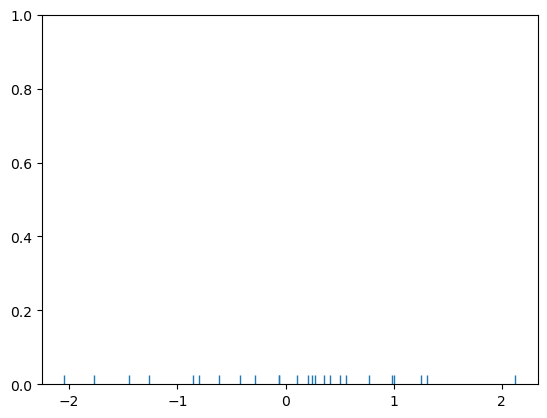

In [6]:
sns.rugplot(ds)

plt.ylim(0,1)

<Axes: >

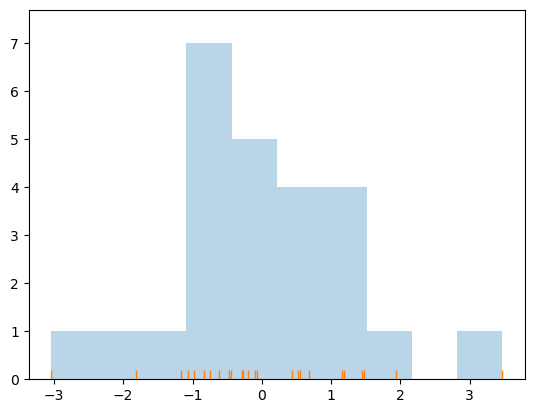

In [5]:
plt.hist(ds, alpha=0.3)
sns.rugplot(ds)

(0.0, 1.0)

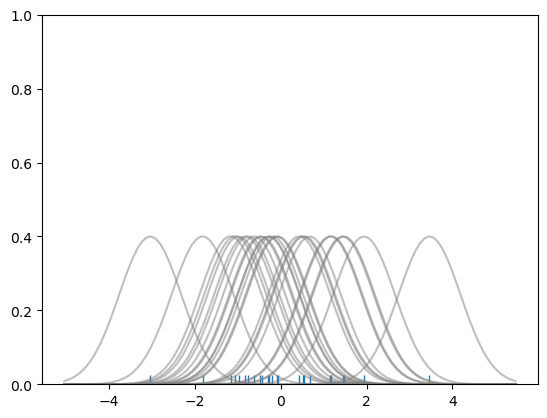

In [6]:
sns.rugplot(ds)

x_min = ds.min() - 2
x_max = ds.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*ds.std()**5) / (3*len(ds))) ** 0.2

kernel_list = []

for data_point in ds:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

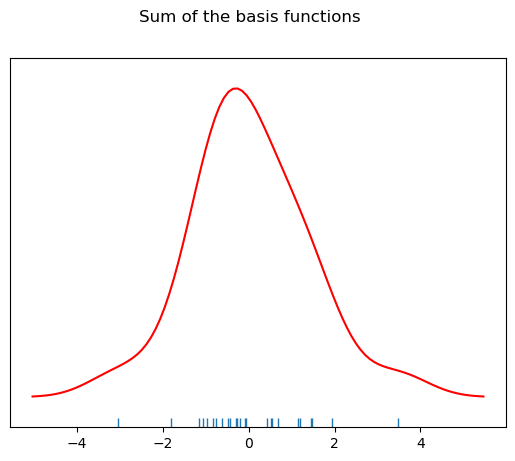

In [7]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='red')

sns.rugplot(ds)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

<Axes: ylabel='Density'>

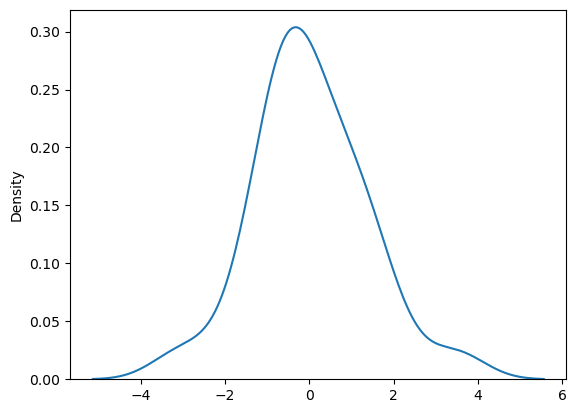

In [8]:
# You can do the same thing above with one single line of code using Seasborn

sns.kdeplot(ds)

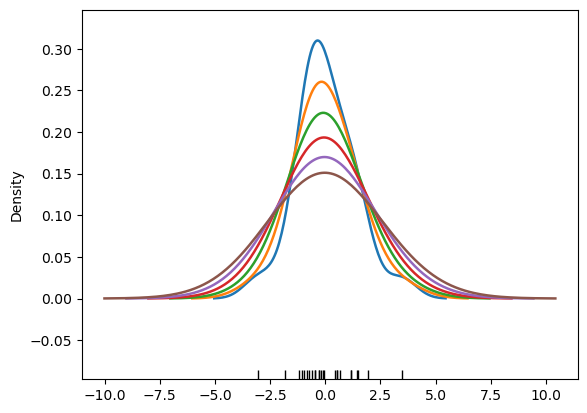

In [9]:
sns.rugplot(ds, color='black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(ds, bw_method=bw, lw=1.8, label=bw)

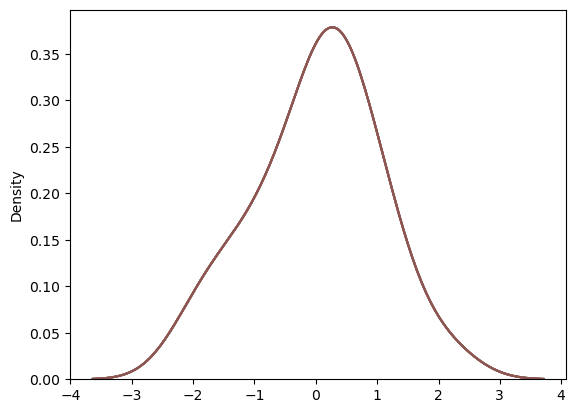

In [26]:
gaussian_options = ['biw','cos','epa','gau','tri','triw']

for kern in gaussian_options:
    sns.kdeplot(ds, kernel= ,label=kern)

<Axes: ylabel='Density'>

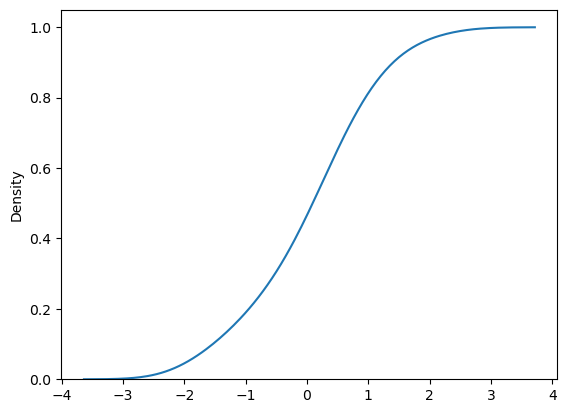

In [7]:
sns.kdeplot(ds, cumulative = True)

<Axes: ylabel='Density'>

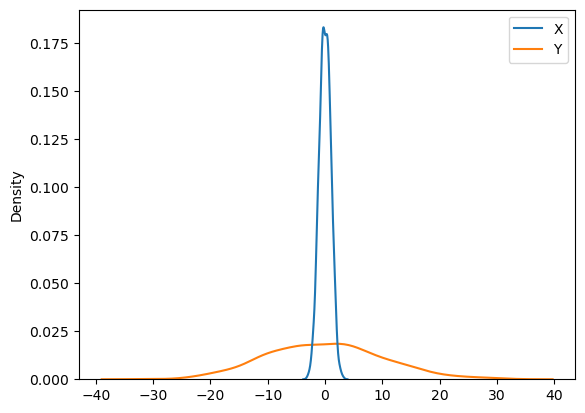

In [9]:
mean = [0,0]

cov = [[1,0], [0,100]]

ds2 = np.random.multivariate_normal(mean, cov, 1000)

df = pd.DataFrame(ds2, columns=['X','Y'])

sns.kdeplot(df)

<Axes: ylabel='Density'>

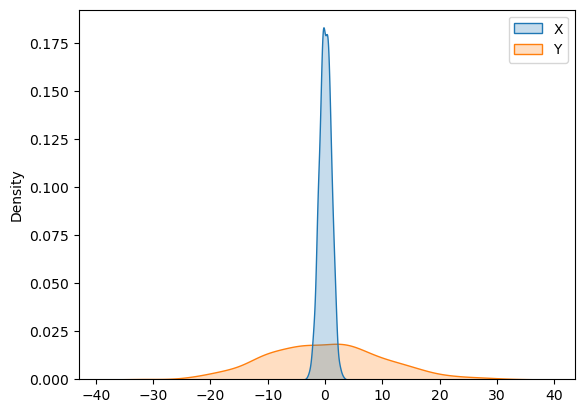

In [21]:
sns.kdeplot(df, bw_adjust=1, fill=True)

<Axes: ylabel='Density'>

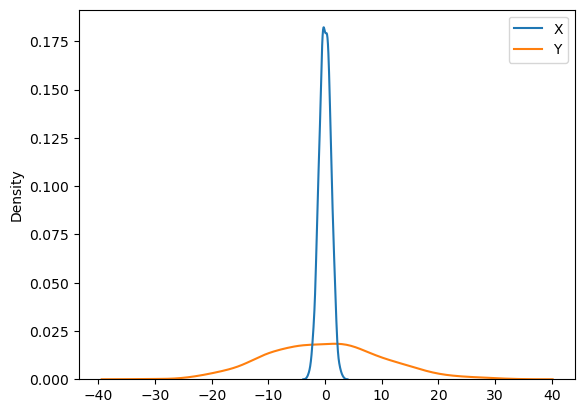